In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("FullCleanData.csv", index_col=[0])
df.head()

,TNOs,isWeekend,Day of Week,Drugs,Robbery,Sexual Offences,Theft and Handling,VAP,AvTemp,Precip,MSC Numbers,Average Wind Speed
Row Labels,,,,,,,,,,,,
02/12/2017,1,1,6,0,0,1,0,0,6.75,0.0,0,6.5
04/12/2017,1,0,1,0,0,0,0,0,9.65,0.0,0,6.4
09/12/2017,1,1,6,0,0,0,1,0,2.85,0.0,0,6.0
31/12/2017,3,0,7,0,0,1,0,2,8.70,5.8,0,16.3
01/01/2018,1,0,1,0,0,0,1,0,7.80,0.0,0,14.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 02/12/2017 to 31/07/2018
Data columns (total 12 columns):
TNOs                  196 non-null int64
isWeekend             196 non-null int64
Day of Week           196 non-null int64
Drugs                 196 non-null int64
Robbery               196 non-null int64
Sexual Offences       196 non-null int64
Theft and Handling    196 non-null int64
VAP                   196 non-null int64
AvTemp                196 non-null float64
Precip                196 non-null float64
MSC Numbers           196 non-null int64
Average Wind Speed    196 non-null float64
dtypes: float64(3), int64(9)
memory usage: 19.9+ KB


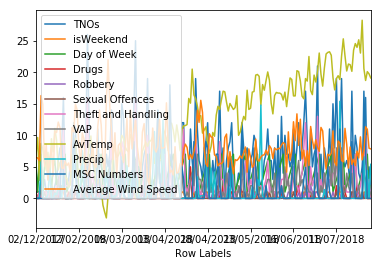

In [5]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001266E30E278>,
      dtype=object)

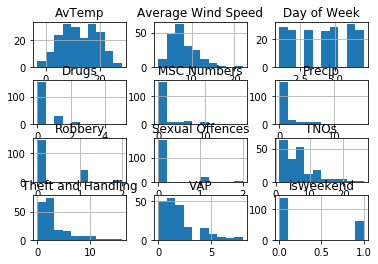

In [6]:
df.hist()

We then do some basic exploration of our data.

In [7]:
df.describe()

,TNOs,isWeekend,Day of Week,Drugs,Robbery,Sexual Offences,Theft and Handling,VAP,AvTemp,Precip,MSC Numbers,Average Wind Speed
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,6.489796,0.306122,4.020408,0.306122,0.280612,0.137755,2.979592,1.795918,12.425383,1.220408,1.617347,7.947789
std,4.753935,0.462061,2.015222,0.670372,0.514240,0.387501,2.922870,1.777115,6.578966,2.577893,3.359106,3.049161
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.100000,0.000000,0.000000,2.150000
25%,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,7.400000,0.000000,0.000000,5.800000
50%,6.000000,0.000000,4.000000,0.000000,0.000000,0.000000,2.000000,1.000000,11.925000,0.000000,0.000000,7.600000
75%,8.000000,1.000000,6.000000,0.000000,0.250000,0.000000,4.000000,2.000000,17.350000,1.200000,1.000000,9.462500
max,26.000000,1.000000,7.000000,5.000000,2.000000,2.000000,16.000000,8.000000,28.250000,15.400000,18.000000,22.000000


## Data Filtering and Cleaning

To improve our analysis, we have reduced our data-set, focusing only on weekend dates, during which the initiative occured.

In [8]:
#We read our data-set from a csv file (not shared due to conditions of our intelligence sharing agreement with the MPS)

df = pd.read_csv("WeekendData.csv", index_col=[0])
df.head()

,TNOs,VAP,isFriday,MSC Numbers,Temp,Precip,Wind Speed,Drugs,Robbery,Sexual Offences,Theft and Handling
Row Labels,,,,,,,,,,,
02/12/2017,1,0,0,0,6.75,0.0,6.50,0,0,1,0
09/12/2017,1,0,0,0,2.85,0.0,6.00,0,0,0,1
05/01/2018,3,1,1,0,5.60,0.0,5.15,0,0,0,1
06/01/2018,1,0,0,0,4.45,0.0,8.60,0,0,0,1
20/01/2018,1,0,0,0,3.35,4.8,6.35,0,0,0,1


In [9]:
df.describe()
# The describe() function examines the characteristics of our data.

,TNOs,VAP,isFriday,MSC Numbers,Temp,Precip,Wind Speed,Drugs,Robbery,Sexual Offences,Theft and Handling
count,60.000000,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,10.233333,2.566667,0.483333,5.266667,1.215792e+01,1.446667,7.599444,0.316667,0.516667,0.183333,5.366667
std,5.837827,2.053246,0.503939,4.214047,6.482008e+00,2.982063,2.780708,0.567231,0.596364,0.469102,3.905523
min,1.000000,0.000000,0.000000,0.000000,-3.996800e-16,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,2.000000,6.137500e+00,0.000000,5.475000,0.000000,0.000000,0.000000,2.750000
50%,10.000000,2.000000,0.000000,5.000000,1.192500e+01,0.000000,7.350000,0.000000,0.000000,0.000000,5.000000
75%,13.000000,4.000000,1.000000,8.000000,1.732500e+01,1.250000,8.762500,1.000000,1.000000,0.000000,8.000000
max,26.000000,8.000000,1.000000,18.000000,2.350000e+01,15.400000,14.950000,2.000000,2.000000,2.000000,16.000000


In [10]:
df['Temp'] = df['Temp'].astype(int)
#For ease of analysis, I have then manually changed AvTemp from a float to an integer.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 02/12/2017 to 28/07/2018
Data columns (total 11 columns):
TNOs                  60 non-null int64
VAP                   60 non-null int64
isFriday              60 non-null int64
MSC Numbers           60 non-null int64
Temp                  60 non-null int32
Precip                60 non-null float64
Wind Speed            60 non-null float64
Drugs                 60 non-null int64
Robbery               60 non-null int64
Sexual Offences       60 non-null int64
Theft and Handling    60 non-null int64
dtypes: float64(2), int32(1), int64(8)
memory usage: 5.4+ KB


In [12]:
df.describe()

,TNOs,VAP,isFriday,MSC Numbers,Temp,Precip,Wind Speed,Drugs,Robbery,Sexual Offences,Theft and Handling
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,10.233333,2.566667,0.483333,5.266667,11.716667,1.446667,7.599444,0.316667,0.516667,0.183333,5.366667
std,5.837827,2.053246,0.503939,4.214047,6.465270,2.982063,2.780708,0.567231,0.596364,0.469102,3.905523
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,2.000000,6.000000,0.000000,5.475000,0.000000,0.000000,0.000000,2.750000
50%,10.000000,2.000000,0.000000,5.000000,11.000000,0.000000,7.350000,0.000000,0.000000,0.000000,5.000000
75%,13.000000,4.000000,1.000000,8.000000,16.500000,1.250000,8.762500,1.000000,1.000000,0.000000,8.000000
max,26.000000,8.000000,1.000000,18.000000,23.000000,15.400000,14.950000,2.000000,2.000000,2.000000,16.000000


Here we can see our data has been succesfully imported into Python and cleaned, with a total of 60 observations (weekends dates during which the initiative took place)

# Linear Regression
We now begin our linear regression analysis

# TNO Analysis
The below examines our best model for Total Notifiable Offences, using Friday/Saturday, temperature, and officer numbers as predictor variables.


In [22]:
import statsmodels.api as sm

X = df[['MSC Numbers','isFriday']]
y = pd.DataFrame(df["TNOs"])
X = sm.add_constant(X.to_numpy())
#We add a constant to our model (as there is no reason to think when our predictors are 0, crime is also 0)

model = sm.OLS(y, X).fit()
# make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   TNOs   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.085
Date:                Sun, 01 Sep 2019   Prob (F-statistic):            0.00928
Time:                        18:37:03   Log-Likelihood:                -185.57
No. Observations:                  60   AIC:                             377.1
Df Residuals:                      57   BIC:                             383.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2817      1.170      8.789      0.000       7.939      12.624
x1             0.4482      0.195      2.301      0.025       0.058       0.838
x2            -4.9838      1.629     -3.060      0.003      -8.246      -1.722
==============================================================================
Omnibus:                        1.453   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                0.974
Skew:                           0.306   Prob(JB):                        0.614
Kurtosis:                       3.119   Cond. No.                         16.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Theft Offences

In [16]:
X = df[['isFriday','Precip','MSC Numbers']]
y = pd.DataFrame(df["Theft and Handling"])
X = sm.add_constant(X.to_numpy())

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Theft and Handling   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.222
Date:                Sun, 01 Sep 2019   Prob (F-statistic):             0.0294
Time:                        18:33:06   Log-Likelihood:                -161.60
No. Observations:                  60   AIC:                             331.2
Df Residuals:                      56   BIC:                             339.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6604      0.792      7.145      0.000       4.073       7.247
x1            -3.0669      1.102     -2.782      0.007      -5.275      -0.859
x2             0.2252      0.172      1.311      0.195      -0.119       0.569
x3             0.1638      0.138      1.184      0.241      -0.113       0.441
==============================================================================
Omnibus:                        3.983   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.677
Skew:                           0.604   Prob(JB):                        0.159
Kurtosis:                       2.905   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Violence

In [17]:
X = df[['isFriday','MSC Numbers','Temp']]
y = pd.DataFrame(df["VAP"])
X = sm.add_constant(X.to_numpy())

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    VAP   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     1.810
Date:                Sun, 01 Sep 2019   Prob (F-statistic):              0.156
Time:                        18:33:09   Log-Likelihood:                -125.02
No. Observations:                  60   AIC:                             258.0
Df Residuals:                      56   BIC:                             266.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8829      0.619      3.040      0.004       0.642       3.124
x1            -1.0227      0.599     -1.707      0.093      -2.223       0.177
x2             0.1214      0.072      1.687      0.097      -0.023       0.266
x3             0.0460      0.041      1.129      0.264      -0.036       0.128
==============================================================================
Omnibus:                        3.538   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.314
Skew:                           0.569   Prob(JB):                        0.191
Kurtosis:                       2.831   Cond. No.                         36.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""